<a href="https://colab.research.google.com/github/leo1929/Notas-Opativa3/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Importamos las librerias a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Utilizaré un archivo csv de entrada, en el cual decidíamos si convenía alquilar 
o comprar casa dadas 9 dimensiones. 

1. Normalizamos los datos de entrada.
2. Aplicamos PCA
3. Veremos que con 5 de las nuevas dimensiones (y descartando 4) obtendremos
hasta un 85% de variación explicada y buenas predicciones.
4. Realizaremos 2 gráficas:
° Una con el acumulado de variabilidad explicada.
° Una gráfica 2D, en donde el eje X e Y serán los 2 primero componentes principales obtenidos por PCA.

In [10]:
#Libreria para Colab
from google.colab import files
uploaded = files.upload()
#Cargamos los datos de entrada
df = pd.read_csv('comprar_alquilar.csv')

Saving comprar_alquilar.csv to comprar_alquilar (3).csv


In [9]:
print(df.tail(10))

     ingresos  gastos_comunes  pago_coche  ...  hijos  trabajo  comprar
192      4653            1024         447  ...      0        3        0
193      3390             881         194  ...      2        5        0
194      2969             623          72  ...      2        6        0
195      4169            1292          48  ...      1        7        1
196      4054            1095         371  ...      0        3        0
197      3831             690         352  ...      0        2        0
198      3961            1030         270  ...      3        8        0
199      3184             955         276  ...      3        8        0
200      3334             867         369  ...      2        5        0
201      3988            1157         105  ...      0        4        0

[10 rows x 10 columns]


In [12]:
#Normalizamos los datos
scaler=StandardScaler()
dff = df.drop(['comprar'], axis=1) # quito la variable dependiente "Y"
scaler.fit(dff) # calculo la media para poder hacer la transformaciófn
X_scaled=scaler.transform(dff)# Ahora si, escalo los datos y los normalizo

In [14]:
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=9) # Otra opción es instanciar PCA sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # Obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza 

shape of X_pca (202, 9)
[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma: 0.852406211771431


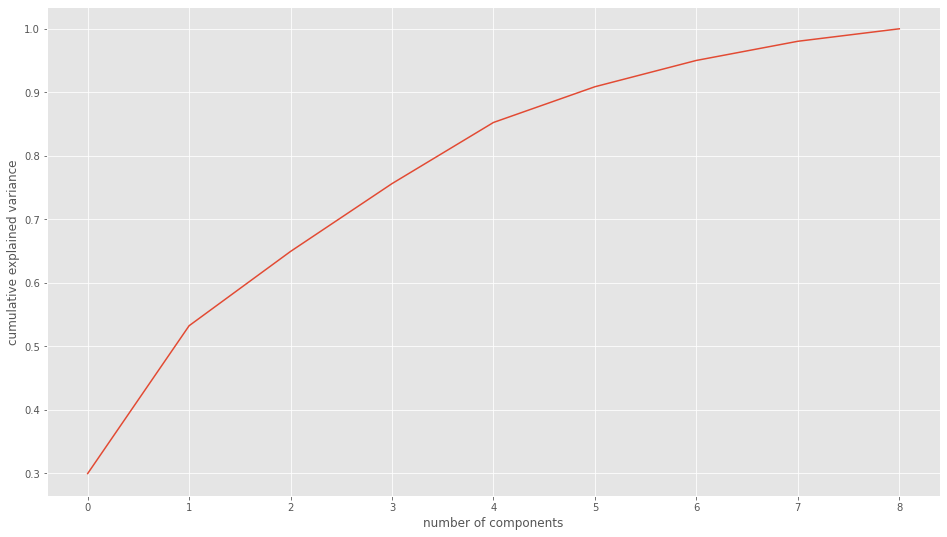

In [15]:
#graficamos el acumulado de varianza de las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

En esta gráfica de variabilidad explicada acumulada, vemos que tomando los primeros 5 componentes llegamos al 85%

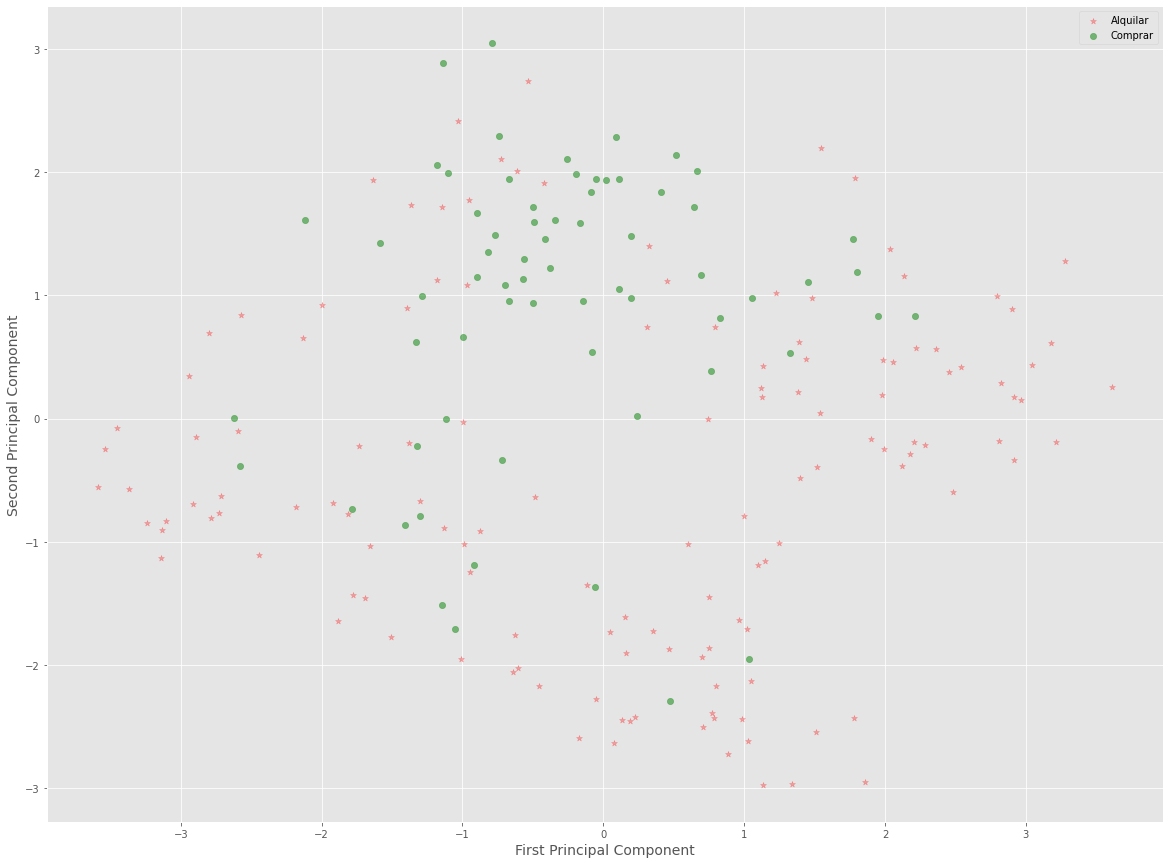

In [20]:
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=df['comprar'].values
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(20,15))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
 
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()

Aquí vemos que al reducir las 9 dimensiones iniciales a tan sólo 2 logramos darnos una idea de dónde visualizar nuestras predicciones para comprar o alquilar casa.